In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Feature  Engineeering

In [2]:
file_path = "raw_data/Q_13_previous-1950-2023_RR-T-Vent.csv.gz"

# Read the CSV file
df_2023 = pd.read_csv(file_path, compression="gzip", sep=";")

# Display first few rows
df_2023.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR
0,13001002,AIX-PUYRICARD,43.593333,5.413333,314,19620701,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13001002,AIX-PUYRICARD,43.593333,5.413333,314,19620702,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13001002,AIX-PUYRICARD,43.593333,5.413333,314,19620703,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13001002,AIX-PUYRICARD,43.593333,5.413333,314,19620704,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13001002,AIX-PUYRICARD,43.593333,5.413333,314,19620705,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202310 entries, 0 to 1202309
Data columns (total 58 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   NUM_POSTE  1202310 non-null  int64  
 1   NOM_USUEL  1202310 non-null  object 
 2   LAT        1202310 non-null  float64
 3   LON        1202310 non-null  float64
 4   ALTI       1202310 non-null  int64  
 5   AAAAMMJJ   1202310 non-null  int64  
 6   RR         1175688 non-null  float64
 7   QRR        1175972 non-null  float64
 8   TN         648449 non-null   float64
 9   QTN        648549 non-null   float64
 10  HTN        286614 non-null   float64
 11  QHTN       286810 non-null   float64
 12  TX         637884 non-null   float64
 13  QTX        638354 non-null   float64
 14  HTX        286703 non-null   float64
 15  QHTX       287277 non-null   float64
 16  TM         339774 non-null   float64
 17  QTM        339792 non-null   float64
 18  TNTXM      637799 non-null   float64
 19  

In [4]:
#number of station
df_2023["NOM_USUEL"].nunique()

112

In [5]:
#name of the stations
df_2023['NOM_USUEL'].unique()

array(['AIX-PUYRICARD', 'AIX-LES MILLES', 'AIX EN PROVENCE',
       'AIX-LA-MOLLE', 'ARLES-VILLE', 'ARLES-SALIN', 'ARLES',
       'ARLES-SAMBUC', 'ARLES-ROUSTY', 'ARLES-MAS-REY', 'AUBAGNE',
       'AUBAGNE-DDE', 'AURIOL COL DE LA COUTRONNE', 'BARBENTANE', 'BERRE',
       'BOUC-BEL-AIR BOURG', 'CABRIES', 'CARRY-LE-ROUET',
       'CASSIS-POMPIERS', 'CASSIS', 'CHARLEVAL BOURG', 'CHATEUNEUF-LES',
       'CHATEAURENARD', 'BEC DE L AIGLE', 'LA CIOTAT LA GUILLAUMIERE',
       'LA CIOTAT PAVILLON DU PORT', 'CUGES-LES-PINS', 'STE BAUME',
       'LA DESTROUSSE BOURG', 'LA DESTROUSSE_SAPC', 'EYGUIERES',
       'EYRAGUES DOMAINE DE BEAUCHAMP', 'EYRAGUES',
       'LA FARE LES OLIVIERS', 'FOS-SUR-MER SOLMER', 'GARDANNE',
       'GARDANNE LA MINE', 'GEMENOS', 'GRAVESON EDF', 'GREASQUE LA MINE',
       'ISTRES', 'JOUQUES', 'LAMBESC', 'MALLEMORT-VILLE', 'MALLEMORT',
       'MALLEMORT QUARTIER DES CLOS', 'MARIGNANE', 'MARSEILLE-OBS',
       'MARSEILLE-MOUREPIANE', 'MARSEILLE-PLANIER', 'POMEGUES',
      

In [6]:
df_2023['date'] = pd.to_datetime(df_2023['AAAAMMJJ'], format='%Y%m%d')

In [7]:
df_2025 = pd.read_csv('raw_data/Q_13_latest-2024-2025_RR-T-Vent.csv.gz', compression="gzip", sep=";")

# Display first few rows
df_2025.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR
0,13001009,AIX EN PROVENCE,43.5295,5.4245,173,20240101,0.0,1.0,0.9,1.0,...,NaN,NaN,9.0,1.0,NaN,NaN,1252.0,9.0,NaN,NaN
1,13001009,AIX EN PROVENCE,43.5295,5.4245,173,20240102,0.2,1.0,0.6,1.0,...,NaN,NaN,4.9,1.0,NaN,NaN,1702.0,9.0,NaN,NaN
2,13001009,AIX EN PROVENCE,43.5295,5.4245,173,20240103,0.0,1.0,4.6,1.0,...,NaN,NaN,4.7,1.0,NaN,NaN,2351.0,9.0,NaN,NaN
3,13001009,AIX EN PROVENCE,43.5295,5.4245,173,20240104,0.8,1.0,2.7,1.0,...,NaN,NaN,6.1,1.0,NaN,NaN,1323.0,9.0,NaN,NaN
4,13001009,AIX EN PROVENCE,43.5295,5.4245,173,20240105,6.6,1.0,7.2,1.0,...,NaN,NaN,8.1,1.0,NaN,NaN,346.0,9.0,NaN,NaN


In [8]:
df_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9404 entries, 0 to 9403
Data columns (total 58 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NUM_POSTE  9404 non-null   int64  
 1   NOM_USUEL  9404 non-null   object 
 2   LAT        9404 non-null   float64
 3   LON        9404 non-null   float64
 4   ALTI       9404 non-null   int64  
 5   AAAAMMJJ   9404 non-null   int64  
 6   RR         8960 non-null   float64
 7   QRR        8960 non-null   float64
 8   TN         8959 non-null   float64
 9   QTN        8960 non-null   float64
 10  HTN        8947 non-null   float64
 11  QHTN       8949 non-null   float64
 12  TX         8960 non-null   float64
 13  QTX        8960 non-null   float64
 14  HTX        8950 non-null   float64
 15  QHTX       8950 non-null   float64
 16  TM         8960 non-null   float64
 17  QTM        8960 non-null   float64
 18  TNTXM      8959 non-null   float64
 19  QTNTXM     8959 non-null   float64
 20  TAMPLI  

In [9]:
df_2025["NOM_USUEL"].nunique()

21

In [10]:
df_2025['NOM_USUEL'].unique()

array(['AIX EN PROVENCE', 'ARLES', 'AUBAGNE', 'CASSIS', 'BEC DE L AIGLE',
       'CUGES-LES-PINS', 'LA DESTROUSSE_SAPC', 'EYRAGUES', 'ISTRES',
       'MARIGNANE', 'MARSEILLE-OBS', 'MARSEILLE', 'CAP COURONNE', 'MIMET',
       'PEYROLLES EN PROVENCE', 'ST CANNAT', 'ST CHAMAS',
       'SALON DE PROVENCE', 'TARASCON', 'TRETS', 'VAUVENARGUES'],
      dtype=object)

In [11]:
# Find common NOM_USUEL values
common_stations = pd.Series(list(set(df_2023['NOM_USUEL']).intersection(set(df_2025['NOM_USUEL']))))
print("Common stations between 2023 and 2025:", common_stations)

Common stations between 2023 and 2025: 0                  TARASCON
1                   AUBAGNE
2                 MARIGNANE
3            CUGES-LES-PINS
4             MARSEILLE-OBS
5     PEYROLLES EN PROVENCE
6                 ST CHAMAS
7                  EYRAGUES
8           AIX EN PROVENCE
9            BEC DE L AIGLE
10                MARSEILLE
11        SALON DE PROVENCE
12                    MIMET
13                ST CANNAT
14       LA DESTROUSSE_SAPC
15                    TRETS
16                    ARLES
17             CAP COURONNE
18             VAUVENARGUES
19                   CASSIS
20                   ISTRES
dtype: object


In [12]:
df_2025['date'] = pd.to_datetime(df_2025['AAAAMMJJ'], format='%Y%m%d')

In [13]:
df_2023 = df_2023[["date", "NOM_USUEL", "TNTXM", "TM", "RR", "FFM", "FF2M", "LAT", "LON"]]
df_2025 = df_2025[["date", "NOM_USUEL", "TNTXM", "TM", "RR", "FFM", "FF2M", "LAT", "LON"]]


In [14]:
print(df_2025.shape)
print(df_2023.shape)


(9404, 9)
(1202310, 9)


### Data is too big! Merging was impossible in local Computer, therefor:

In [15]:
# Ensure that 'date' column is in datetime format
df_2023['date'] = pd.to_datetime(df_2023['date'])

# Set 'date' as the index
df_2023.set_index('date', inplace=True)

# Filter the data to only include dates from 1950 to 2023
df_filtered = df_2023[(df_2023.index.year >= 1950) & (df_2023.index.year <= 2023)]

# Find stations that have data in this period
stations_with_data = df_filtered["NOM_USUEL"].unique()

# Check if any station has data for the full period from 1950 to 2023
station_data_1950_2023 = {}
for station in stations_with_data:
    station_data = df_filtered[df_filtered["NOM_USUEL"] == station]
    min_year = station_data.index.year.min()
    max_year = station_data.index.year.max()

    # If the station has data from 1950 to 2023, add it to the dictionary
    if min_year <= 1950 and max_year >= 2023:
        station_data_1950_2023[station] = station_data

# Display the station(s) with data from 1950 to 2023
for station, data in station_data_1950_2023.items():
    print(f"Station {station} has data from 1950 to 2023.")
    print(data.head())  # Display the first few rows of data for that station

Station AUBAGNE has data from 1950 to 2023.
           NOM_USUEL  TNTXM  TM   RR  FFM  FF2M    LAT       LON
date                                                            
1950-01-01   AUBAGNE    NaN NaN  0.0  NaN   NaN  43.29  5.578333
1950-01-02   AUBAGNE    NaN NaN  0.0  NaN   NaN  43.29  5.578333
1950-01-03   AUBAGNE    NaN NaN  0.0  NaN   NaN  43.29  5.578333
1950-01-04   AUBAGNE    NaN NaN  0.0  NaN   NaN  43.29  5.578333
1950-01-05   AUBAGNE    NaN NaN  0.0  NaN   NaN  43.29  5.578333
Station BEC DE L AIGLE has data from 1950 to 2023.
                 NOM_USUEL  TNTXM  TM   RR  FFM  FF2M        LAT       LON
date                                                                      
1950-01-01  BEC DE L AIGLE   11.0 NaN  0.0  NaN   NaN  43.174667  5.574167
1950-01-02  BEC DE L AIGLE    8.3 NaN  0.0  NaN   NaN  43.174667  5.574167
1950-01-03  BEC DE L AIGLE    8.0 NaN  0.0  NaN   NaN  43.174667  5.574167
1950-01-04  BEC DE L AIGLE    9.6 NaN  0.0  NaN   NaN  43.174667  5.574167


In [16]:
df_2023_aubagne= df_2023[df_2023["NOM_USUEL"] == "AUBAGNE"]
df_2023_aubagne.head()

,NOM_USUEL,TNTXM,TM,RR,FFM,FF2M,LAT,LON
date,,,,,,,,
1950-01-01,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.29,5.578333
1950-01-02,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.29,5.578333
1950-01-03,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.29,5.578333
1950-01-04,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.29,5.578333
1950-01-05,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.29,5.578333


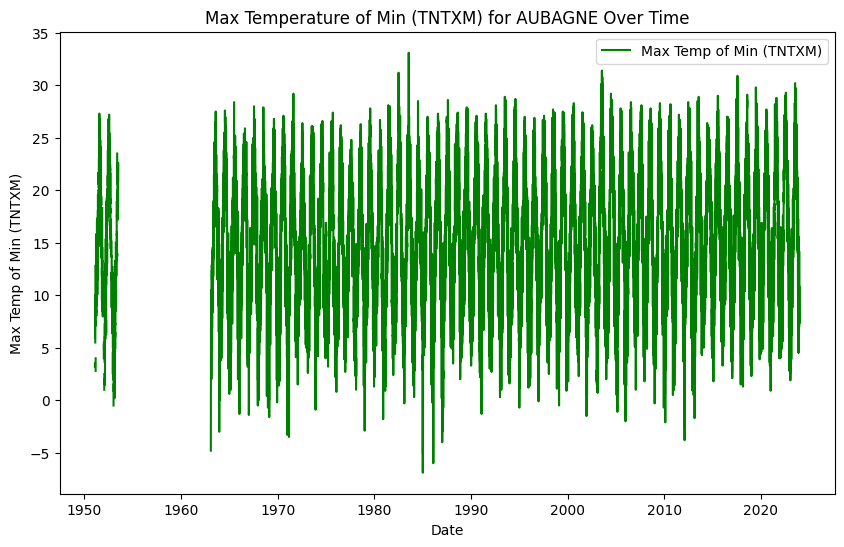

In [17]:
df_2023_aubagne = df_2023_aubagne.sort_index()

# Plot the data for "TNTXM"
plt.figure(figsize=(10, 6))
plt.plot(df_2023_aubagne .index, df_2023_aubagne ["TNTXM"], label="Max Temp of Min (TNTXM)", color="green")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Max Temp of Min (TNTXM)')
plt.title('Max Temperature of Min (TNTXM) for AUBAGNE Over Time')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [18]:
df_2025.set_index('date', inplace=True)

# Filter the data to only include dates from 2024 to 2025
df_filtered = df_2025[(df_2025.index.year >= 2024) & (df_2025.index.year <= 2025)]

# Find stations that have data in this period
stations_with_data = df_filtered["NOM_USUEL"].unique()

# Check if any station has data for the full period from 2024 to 2025
station_data_2024_2025 = {}
for station in stations_with_data:
    station_data = df_filtered[df_filtered["NOM_USUEL"] == station]
    min_year = station_data.index.year.min()
    max_year = station_data.index.year.max()

    # If the station has data from 2024 to 2025, add it to the dictionary
    if min_year <= 2024 and max_year >= 2025:
        station_data_2024_2025[station] = station_data

# Display the station(s) with data from 2024 to 2025
for station, data in station_data_2024_2025.items():
    print(f"Station {station} has data from 2024 to 2025.")
    print(data.head())  # Display the first few rows of data for that station

Station AIX EN PROVENCE has data from 2024 to 2025.
                  NOM_USUEL  TNTXM    TM   RR  FFM  FF2M      LAT     LON
date                                                                     
2024-01-01  AIX EN PROVENCE    6.9   5.3  0.0  1.2   NaN  43.5295  5.4245
2024-01-02  AIX EN PROVENCE    6.8   7.6  0.2  1.0   NaN  43.5295  5.4245
2024-01-03  AIX EN PROVENCE    8.9   8.1  0.0  0.5   NaN  43.5295  5.4245
2024-01-04  AIX EN PROVENCE    9.4   9.2  0.8  0.9   NaN  43.5295  5.4245
2024-01-05  AIX EN PROVENCE    9.5  10.1  6.6  1.5   NaN  43.5295  5.4245
Station ARLES has data from 2024 to 2025.
           NOM_USUEL  TNTXM    TM   RR  FFM  FF2M    LAT       LON
date                                                              
2024-01-01     ARLES    8.3   7.9  0.0  2.8   NaN  43.51  4.693833
2024-01-02     ARLES    7.4   7.9  0.0  2.4   NaN  43.51  4.693833
2024-01-03     ARLES    9.5  10.1  0.0  2.8   NaN  43.51  4.693833
2024-01-04     ARLES   12.2  11.9  1.4  2.8   NaN  43

In [19]:
df_2025_aubagne= df_2025[df_2025["NOM_USUEL"] == "AUBAGNE"]
df_2025_aubagne.head()

,NOM_USUEL,TNTXM,TM,RR,FFM,FF2M,LAT,LON
date,,,,,,,,
2024-01-01,AUBAGNE,8.5,7.3,0.0,1.7,NaN,43.307333,5.601167
2024-01-02,AUBAGNE,6.7,7.4,0.2,1.5,NaN,43.307333,5.601167
2024-01-03,AUBAGNE,10.1,10.0,0.0,1.5,NaN,43.307333,5.601167
2024-01-04,AUBAGNE,11.3,11.1,3.0,1.8,NaN,43.307333,5.601167
2024-01-05,AUBAGNE,9.7,10.7,12.6,1.8,NaN,43.307333,5.601167


In [20]:
df_aubagne = pd.concat([df_2023_aubagne, df_2025_aubagne], ignore_index=False)
df_aubagne.head()

,NOM_USUEL,TNTXM,TM,RR,FFM,FF2M,LAT,LON
date,,,,,,,,
1950-01-01,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.2900,5.578333
1950-01-01,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.3005,5.540500
1950-01-02,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.3005,5.540500
1950-01-02,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.2900,5.578333
1950-01-03,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.2900,5.578333


In [21]:
df_aubagne.tail()

,NOM_USUEL,TNTXM,TM,RR,FFM,FF2M,LAT,LON
date,,,,,,,,
2025-03-19,AUBAGNE,11.0,10.8,0.0,2.8,NaN,43.307333,5.601167
2025-03-20,AUBAGNE,11.8,12.3,0.0,2.1,NaN,43.307333,5.601167
2025-03-21,AUBAGNE,14.3,14.9,5.4,5.7,NaN,43.307333,5.601167
2025-03-22,AUBAGNE,14.5,13.0,17.6,4.4,NaN,43.307333,5.601167
2025-03-23,AUBAGNE,11.8,10.5,16.2,1.4,NaN,43.307333,5.601167


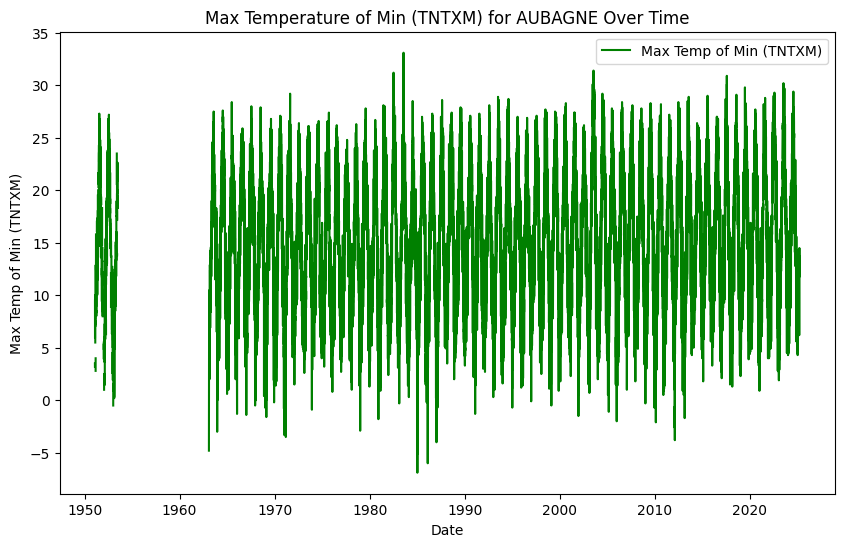

In [22]:

# Plot the data for "TNTXM"
plt.figure(figsize=(10, 6))
plt.plot(df_aubagne.index, df_aubagne["TNTXM"], label="Max Temp of Min (TNTXM)", color="green")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Max Temp of Min (TNTXM)')
plt.title('Max Temperature of Min (TNTXM) for AUBAGNE Over Time')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [23]:
df_aubagne.isnull().sum()

NOM_USUEL        0
TNTXM         4933
TM           17203
RR              34
FFM          16281
FF2M         29482
LAT              0
LON              0
dtype: int64

In [24]:
nan_rows = df_aubagne.loc[df_aubagne["TNTXM"].isnull()]

# Display the rows with NaN values in the 'TNTXM' column
nan_rows

,NOM_USUEL,TNTXM,TM,RR,FFM,FF2M,LAT,LON
date,,,,,,,,
1950-01-01,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.290000,5.578333
1950-01-01,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.300500,5.540500
1950-01-02,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.300500,5.540500
1950-01-02,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.290000,5.578333
1950-01-03,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.290000,5.578333
...,...,...,...,...,...,...,...,...
1963-01-28,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.290000,5.578333
1963-01-29,AUBAGNE,NaN,NaN,0.6,NaN,NaN,43.290000,5.578333
1963-01-30,AUBAGNE,NaN,NaN,0.0,NaN,NaN,43.290000,5.578333


In [25]:
df= df_aubagne[df_aubagne.index >= "1964-01-01"]
# Display the filtered data
df.head()


,NOM_USUEL,TNTXM,TM,RR,FFM,FF2M,LAT,LON
date,,,,,,,,
1964-01-01,AUBAGNE,9.9,NaN,0.0,NaN,NaN,43.29,5.578333
1964-01-02,AUBAGNE,7.5,NaN,0.0,NaN,NaN,43.29,5.578333
1964-01-03,AUBAGNE,6.5,NaN,0.0,NaN,NaN,43.29,5.578333
1964-01-04,AUBAGNE,7.0,NaN,0.0,NaN,NaN,43.29,5.578333
1964-01-05,AUBAGNE,4.8,NaN,0.0,NaN,NaN,43.29,5.578333


In [26]:
df.tail()

,NOM_USUEL,TNTXM,TM,RR,FFM,FF2M,LAT,LON
date,,,,,,,,
2025-03-19,AUBAGNE,11.0,10.8,0.0,2.8,NaN,43.307333,5.601167
2025-03-20,AUBAGNE,11.8,12.3,0.0,2.1,NaN,43.307333,5.601167
2025-03-21,AUBAGNE,14.3,14.9,5.4,5.7,NaN,43.307333,5.601167
2025-03-22,AUBAGNE,14.5,13.0,17.6,4.4,NaN,43.307333,5.601167
2025-03-23,AUBAGNE,11.8,10.5,16.2,1.4,NaN,43.307333,5.601167


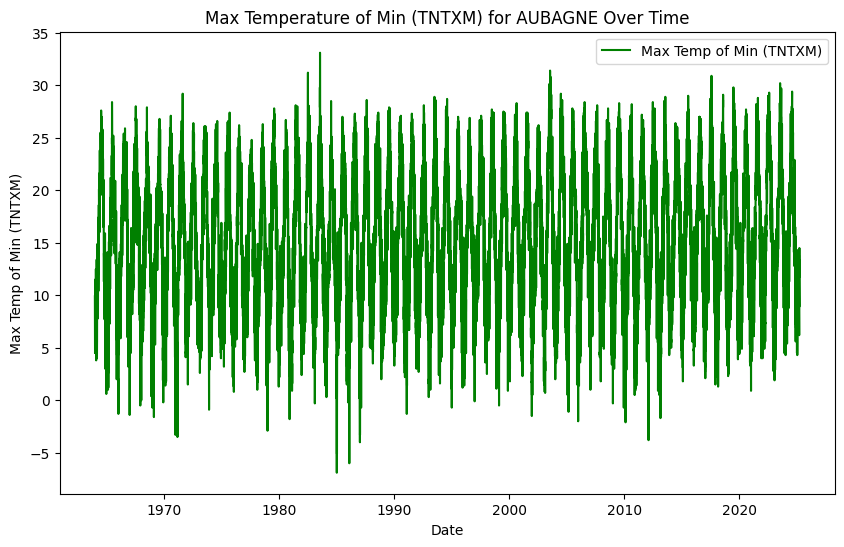

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["TNTXM"], label="Max Temp of Min (TNTXM)", color="green")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Max Temp of Min (TNTXM)')
plt.title('Max Temperature of Min (TNTXM) for AUBAGNE Over Time')

# Show legend
plt.legend()

# Show the plot
plt.show()


## Data Cleaning

In [31]:
df["TNTXM"] = df["TNTXM"].fillna(method='ffill')

/tmp/ipykernel_189816/1053890384.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["TNTXM"] = df["TNTXM"].fillna(method='ffill')
/tmp/ipykernel_189816/1053890384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TNTXM"] = df["TNTXM"].fillna(method='ffill')


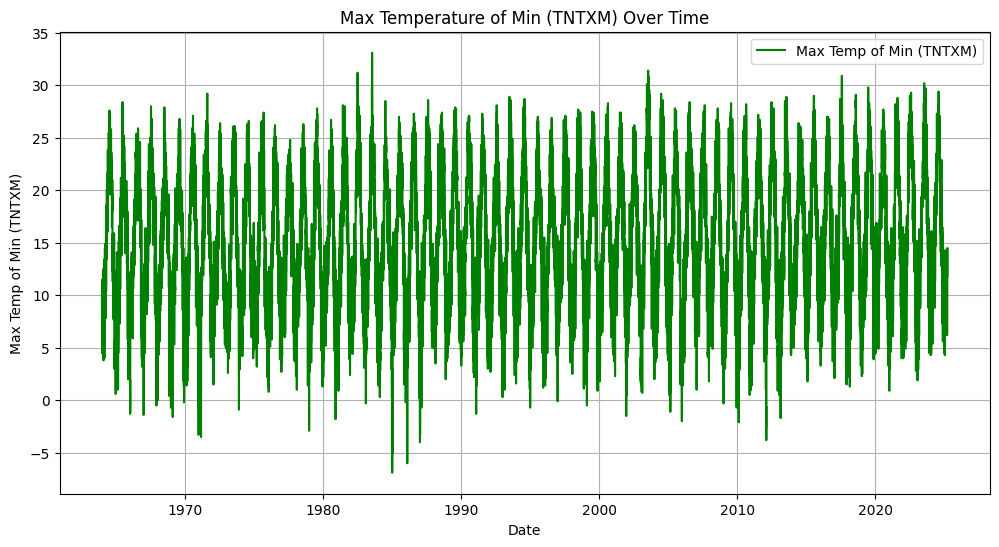

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["TNTXM"], label="Max Temp of Min (TNTXM)", color="green")
plt.xlabel('Date')
plt.ylabel('Max Temp of Min (TNTXM)')
plt.title('Max Temperature of Min (TNTXM) Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
df["TNTXM"].isnull().sum()

np.int64(0)

## Train-Test Spiliting

In [34]:
train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
train, test = df[:train_size], df[train_size:]

### Finding Outlier

In [35]:
from scipy.stats import zscore

# Apply Z-score normalization on the training data for 'TNTXM' column
train['TNTXM_zscore'] = zscore(train['TNTXM'])

# Define a threshold for detecting outliers
threshold = 3  # Values with z-score > 3 or < -3 are considered outliers

# Find outliers based on the Z-score threshold
outliers_train = train[train['TNTXM_zscore'].abs() > threshold]

# Display the outliers
print(outliers_train)

           NOM_USUEL  TNTXM  TM   RR  FFM  FF2M    LAT       LON  TNTXM_zscore
date                                                                          
1985-01-07   AUBAGNE   -4.8 NaN  0.5  NaN   NaN  43.29  5.578333     -3.045578
1985-01-08   AUBAGNE   -6.9 NaN  0.0  NaN   NaN  43.29  5.578333     -3.372914
1985-01-09   AUBAGNE   -5.3 NaN  0.0  NaN   NaN  43.29  5.578333     -3.123515
1985-01-14   AUBAGNE   -5.1 NaN  0.0  NaN   NaN  43.29  5.578333     -3.092340
1986-02-10   AUBAGNE   -6.0 NaN  0.0  NaN   NaN  43.29  5.578333     -3.232627


/tmp/ipykernel_189816/287524411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['TNTXM_zscore'] = zscore(train['TNTXM'])


In [ ]:
# I think we can ignore outliers, however  you can remove them by uncomment fallowing:
#train_cleaned = train[train['TNTXM_zscore'].abs() <= threshold]

## Check The series is stationary?

In [36]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the training data
adf_test = adfuller(train['TNTXM'])

# Display the test statistic and p-value
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Interpret the result
if adf_test[1] <= 0.05:
    print("The series is stationary (reject H0).")
else:
    print("The series is non-stationary (fail to reject H0).")

ADF Statistic: -10.22185667185915
p-value: 5.2992097080654236e-18
The series is stationary (reject H0).


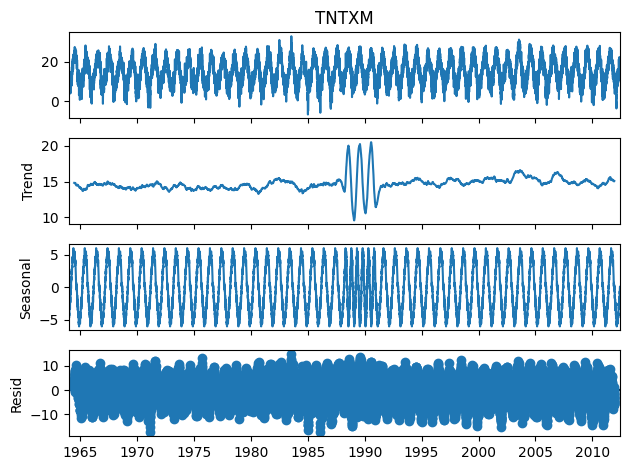

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assume the frequency is set correctly, or you can set it explicitly: df = df.asfreq('D') (daily data)
decomp_train_add = seasonal_decompose(train['TNTXM'], model="additive", period=365)  # assuming yearly seasonality

# You can now examine the trend, seasonal, and residual components for training data
decomp_train_add.plot()
plt.show()